#### Correlation

* Correlation measures association, but doesn't show if x causes y or vice versa
* Correlation is a statistic that measures the degree to which two variables move in relation to each other
* In finance, the correlation can measure the movement of a stock with that of a benchmark index, such as the S&P 500

![alt text](Correlation.png)

In [1]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import numpy as np

In [3]:
tickers = ['AAPL', 'BABA', 'IBM', 'MSFT']
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 3, 1)
data = pdr.get_data_stooq(tickers, start, end)

In [4]:
data = data[::-1]

In [6]:
data = data['Close']

In [7]:
data

Symbols,AAPL,BABA,IBM,MSFT
Date,,,,
2020-01-02,73.5616,219.77,116.720,156.133
2020-01-03,72.8488,217.00,115.784,154.216
2020-01-06,73.4250,216.64,115.569,154.613
2020-01-07,73.0831,217.63,115.656,153.183
2020-01-08,74.2575,218.00,116.623,155.656
...,...,...,...,...
2021-02-23,124.5600,252.75,110.962,229.716
2021-02-24,124.0510,250.34,113.256,230.966
2021-02-25,119.7240,240.18,112.573,225.487


In [8]:
log_returns = np.log(data/data.shift())

In [9]:
log_returns

Symbols,AAPL,BABA,IBM,MSFT
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009737,-0.012684,-0.008052,-0.012354
2020-01-06,0.007878,-0.001660,-0.001859,0.002571
2020-01-07,-0.004667,0.004559,0.000753,-0.009292
2020-01-08,0.015942,0.001699,0.008326,0.016015
...,...,...,...,...
2021-02-23,-0.001115,-0.004933,-0.001144,-0.005254
2021-02-24,-0.004095,-0.009581,0.020463,0.005427
2021-02-25,-0.035504,-0.041431,-0.006049,-0.024008


In [10]:
log_returns.corr()

Symbols,AAPL,BABA,IBM,MSFT
Symbols,,,,
AAPL,1.000000,0.494181,0.533946,0.829827
BABA,0.494181,1.000000,0.332575,0.548186
IBM,0.533946,0.332575,1.000000,0.595718
MSFT,0.829827,0.548186,0.595718,1.000000


In [28]:
sp500 = pdr.get_data_stooq("^SPX",start,end)

In [29]:
sp500 = sp500[::-1]

In [30]:
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,3244.67,3258.14,3235.53,3257.85,1921250000
2020-01-03,3226.36,3246.15,3222.34,3234.85,1922938889
2020-01-06,3217.55,3246.84,3214.64,3246.28,2041150000
2020-01-07,3241.86,3244.91,3232.43,3237.18,1900211111
2020-01-08,3238.59,3267.07,3236.67,3253.05,2067161111


In [31]:
log_returns['SP500'] = np.log(sp500['Close']/sp500['Close'].shift())

In [33]:
log_returns.corr()

Symbols,AAPL,BABA,IBM,MSFT,SP500
Symbols,,,,,
AAPL,1.000000,0.494181,0.533946,0.829827,0.818268
BABA,0.494181,1.000000,0.332575,0.548186,0.503329
IBM,0.533946,0.332575,1.000000,0.595718,0.791977
MSFT,0.829827,0.548186,0.595718,1.000000,0.870645
SP500,0.818268,0.503329,0.791977,0.870645,1.000000


In [48]:
def test_correlation(ticker):
    df = pdr.get_data_stooq(ticker, start)
    df = df[::-1]
    lr = log_returns.copy()
    lr[ticker] = np.log(df['Close']/df['Close'].shift())
    return lr.corr()

In [50]:
test_correlation("TLT")

Symbols,AAPL,BABA,IBM,MSFT,SP500,TLT
Symbols,,,,,,
AAPL,1.000000,0.494181,0.533946,0.829827,0.818268,-0.350307
BABA,0.494181,1.000000,0.332575,0.548186,0.503329,-0.205355
IBM,0.533946,0.332575,1.000000,0.595718,0.791977,-0.444726
MSFT,0.829827,0.548186,0.595718,1.000000,0.870645,-0.355313
SP500,0.818268,0.503329,0.791977,0.870645,1.000000,-0.460005
TLT,-0.350307,-0.205355,-0.444726,-0.355313,-0.460005,1.000000


In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
def visualize_correlation(ticker1, ticker2):
    df = pdr.get_data_stooq([ticker1, ticker2],start,end)
    df = df[::-1]
    df = df['Close']
    df = df/df.iloc[0]
    fig, ax = plt.subplots()
    df.plot(ax = ax)

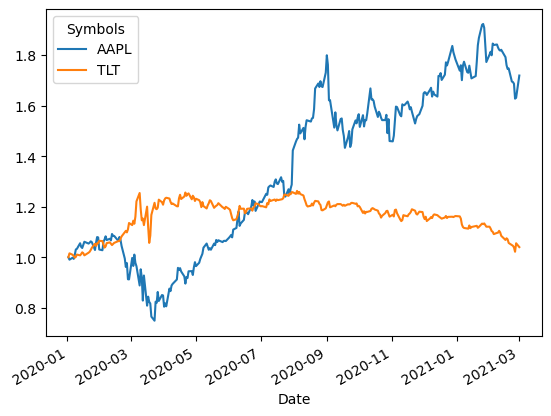

In [55]:
visualize_correlation("AAPL", "TLT")

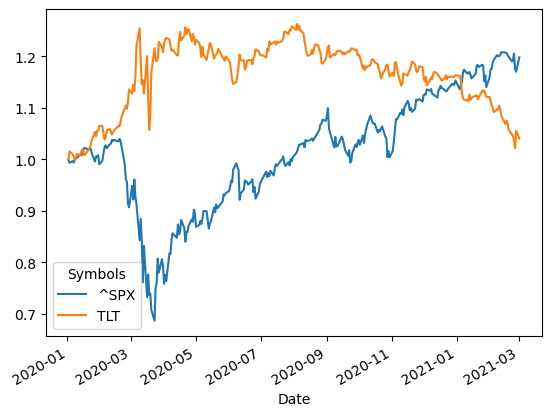

In [56]:
visualize_correlation("^SPX","TLT")